In [2]:
import pandas as pd

In [1]:
!ls ../data/*.csv

../data/comments.csv               ../data/fbworkouts_clean.csv
../data/fbcommenters.csv           ../data/user_item_interactions.csv
../data/fbworkouts.csv


# User Item Interaction
### After filtering out infrequent users (with < 5 comments), `75% of the users have interacted with less than 15 workouts`.
### The user item interaction count is `heavily right-skewed`.

In [12]:
df = pd.read_csv('../data/user_item_interactions.csv')
df.sample(5)

,user_id,workout_id
3491,54,78
41652,3602,196
86414,18530,284
41876,3622,83
13084,538,237


In [13]:
user_item_count = df.groupby('user_id').count().reset_index()
user_item_count = user_item_count[user_item_count['workout_id'] >= 5]
user_item_count.sample(5)

,user_id,workout_id
2945,2946,13
12738,12739,8
8681,8682,7
8310,8311,11
14417,14418,7


### Some basic stats and graph

In [10]:
user_item_count['workout_id'].describe()

count    4026.000000
mean       15.524093
std        27.912784
min         5.000000
25%         6.000000
50%         9.000000
75%        15.000000
max       845.000000
Name: workout_id, dtype: float64

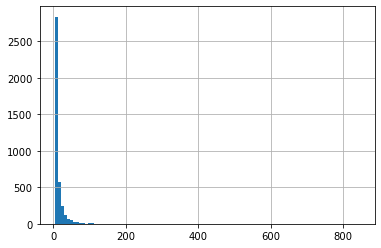

In [14]:
user_item_count['workout_id'].hist(bins=100);

In [15]:
import numpy as np

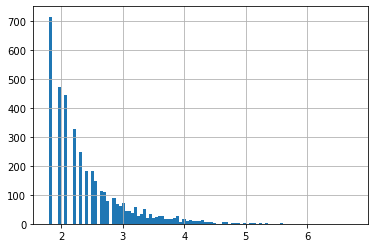

In [17]:
# took the log to make the chart more obvious
pd.Series(np.log1p(user_item_count['workout_id'])).hist(bins=100);

# FB Workouts

In [37]:
workouts = pd.read_csv('../data/fbworkouts.csv')
workouts.sample(5)

,workout_id,duration,calorie_burn,difficulty,equipment,training_type,body_focus,youtube_link
341,342,31 Minutes,210-402,4,No Equipment,"Cardiovascular, HIIT, Toning","Core, Total Body",https://www.youtube.com/watch?v=FzPFbOw4SCM
27,28,38 Minutes,169-376,3,"Bench, Dumbbell","Low Impact, Strength Training",Upper Body,https://www.youtube.com/watch?v=zRH8BpVv8xA
336,337,29 Minutes,208-348,4,No Equipment,"Cardiovascular, Toning",Total Body,https://www.youtube.com/watch?v=-yNfdhsgz24
82,83,37 Minutes,240-410,4,Dumbbell,"Cardiovascular, HIIT, Strength Training, Toning",Total Body,https://www.youtube.com/watch?v=juh98840e5I
149,150,7 Minutes,18-25,2,"Mat, No Equipment",Warm Up/Cool Down,Total Body,https://www.youtube.com/watch?v=WK1t1-d2t1Y


In [38]:
# cleaning
workouts['duration'] = workouts['duration'].str.replace(' Minutes', '').astype(int)
workouts['calorie_burn'] = workouts['calorie_burn'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)

### Duration
### `75% workouts span less than 30 minutes, with a peak at 10 minutes.`

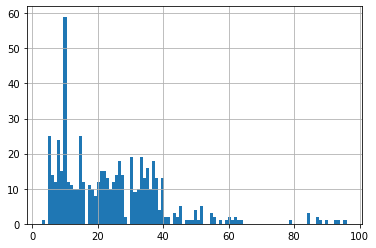

In [40]:
workouts['duration'].hist(bins=100);

In [42]:
workouts['duration'].describe()

count    580.000000
mean      23.974138
std       15.750681
min        3.000000
25%       10.000000
50%       22.000000
75%       33.000000
max       96.000000
Name: duration, dtype: float64

### Calorie Burn
### `The majority is light to medium workout.`

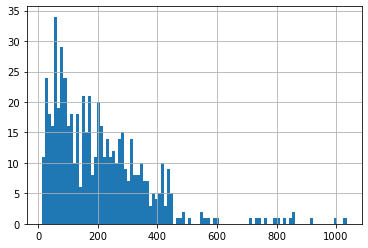

In [43]:
workouts['calorie_burn'].hist(bins=100);

In [44]:
workouts['calorie_burn'].describe()

count     580.000000
mean      204.650000
std       157.598112
min        13.500000
25%        82.875000
50%       173.250000
75%       282.875000
max      1035.000000
Name: calorie_burn, dtype: float64

### Difficulty
### `Difficulty is slightly left skewed, focusing mostly medium hard workouts.`

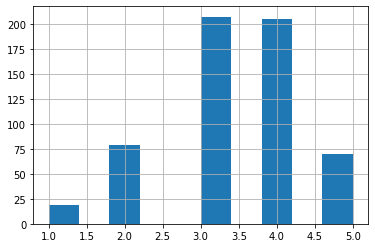

In [48]:
workouts['difficulty'].hist(bins=10);

In [49]:
workouts['difficulty'].describe()

count    580.000000
mean       3.393103
std        0.974965
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: difficulty, dtype: float64

### Equipment
### `Most do not require Equipment and some require a mat and dumbells.`

In [94]:
from collections import defaultdict

equipment_count = defaultdict(int)

for i in workouts['equipment']:
    equipments = i.split(', ')
    for e in equipments:
        equipment_count[e] += 1
equipment_count

defaultdict(int,
            {'Bench': 30,
             'Dumbbell': 180,
             'Kettlebell': 24,
             'Jump Rope': 9,
             'No Equipment': 412,
             'Mat': 153,
             'Exercise Band': 13,
             'Medicine Ball': 7,
             'Aerobics Step': 5,
             'Sandbag': 4,
             'Barbell': 3,
             'Physio-Ball': 15,
             'Stationary Bike': 1})

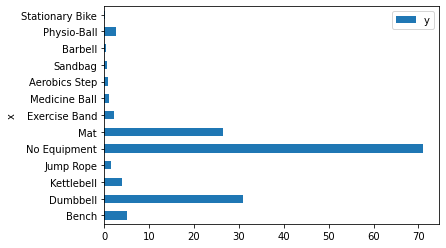

In [95]:
import matplotlib.pyplot as plt

perc = [round(equipment_count[i]/len(workouts)*100, 1) for i in equipment_count]
pd.DataFrame({'x': [i for i in equipment_count], 'y': perc}).set_index('x').plot(kind='barh');

### Training Type
### `Most workouts are for toning, low impact workouts that help to build cardio. Less about building mass.`

In [96]:
from collections import defaultdict

type_count = defaultdict(int)

for i in workouts['training_type']:
    types = i.split(', ')
    for t in types:
        type_count[t] += 1
type_count

defaultdict(int,
            {'Strength Training': 198,
             'Kettlebell': 20,
             'Cardiovascular': 267,
             'HIIT': 155,
             'Stretching/Flexibility': 47,
             'Pilates': 56,
             'Toning': 439,
             'Low Impact': 228,
             'Balance/Agility': 21,
             'Warm Up/Cool Down': 46,
             'Barre': 25,
             'Plyometric': 32})

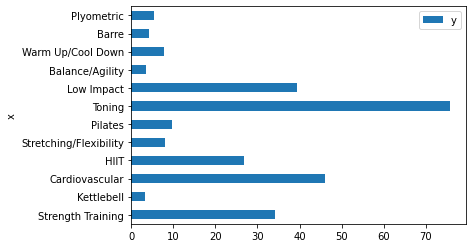

In [97]:
import matplotlib.pyplot as plt

perc = [round(type_count[i]/len(workouts)*100, 1) for i in type_count]
pd.DataFrame({'x': [i for i in type_count], 'y': perc}).set_index('x').plot(kind='barh');

### Body Focus
### `Focusing a lot on whole body (well-rounded health), lower body, and core. Less about upper body.`

In [100]:
workouts['body_focus']

0                   Upper Body
1                   Total Body
2      Lower Body,  Total Body
3                   Lower Body
4            Core,  Lower Body
                ...           
575                 Total Body
576    Total Body,  Lower Body
577                       Core
578                 Total Body
579                       Core
Name: body_focus, Length: 580, dtype: object

In [105]:
from collections import defaultdict

focus_count = defaultdict(int)

for i in workouts['body_focus']:
    focuses = i.replace('\xa0', ' ').split(',  ')
    for f in focuses:
        focus_count[f] += 1
focus_count

defaultdict(int,
            {'Upper Body': 93,
             'Total Body': 284,
             'Lower Body': 190,
             'Core': 148})

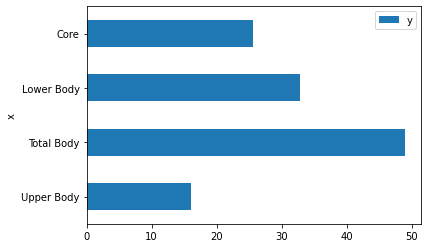

In [106]:
import matplotlib.pyplot as plt

perc = [round(focus_count[i]/len(workouts)*100, 1) for i in focus_count]
pd.DataFrame({'x': [i for i in focus_count], 'y': perc}).set_index('x').plot(kind='barh');